In [1]:
#We will need to load visualize and train the model so importing
#these libraries

#For data handling and visualization
import pandas as pd
import matplotlib.pyplot as plt
import regex as re

#For NLP Tasks
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#For Deep Learning model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,SpatialDropout1D
from tensorflow.keras.layers import Embedding


In [2]:
df = pd.read_csv("./Tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
print(f"We have {len(df.columns)} columns")
print("Which are as follows :\n")
col_id = 1
for col in df.columns:
    print(col_id," ",col)
    col_id+=1

We have 15 columns
Which are as follows :

1   tweet_id
2   airline_sentiment
3   airline_sentiment_confidence
4   negativereason
5   negativereason_confidence
6   airline
7   airline_sentiment_gold
8   name
9   negativereason_gold
10   retweet_count
11   text
12   tweet_coord
13   tweet_created
14   tweet_location
15   user_timezone


In [4]:
# df['text'] = df['text'].str.replace('@','')
df['text'] = df['text'].apply(lambda x: re.sub(r"@", "", x))

In [5]:
df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

In [6]:
''' we will only need the text and it's sentiment to train this model
that's why let's use only what is needed from this data'''

tweet_df = df[['text','airline_sentiment']]
print(tweet_df.shape)
print("\n")
print(tweet_df.head(5))

(14640, 2)


                                                text airline_sentiment
0                  VirginAmerica What dhepburn said.           neutral
1  VirginAmerica plus you've added commercials to...          positive
2  VirginAmerica I didn't today... Must mean I ne...           neutral
3  VirginAmerica it's really aggressive to blast ...          negative
4  VirginAmerica and it's a really big bad thing ...          negative


In [7]:
tweet_df = tweet_df[tweet_df['airline_sentiment'] != 'neutral']
print(tweet_df.shape)
print(tweet_df.head())

(11541, 2)
                                                text airline_sentiment
1  VirginAmerica plus you've added commercials to...          positive
3  VirginAmerica it's really aggressive to blast ...          negative
4  VirginAmerica and it's a really big bad thing ...          negative
5  VirginAmerica seriously would pay $30 a flight...          negative
6  VirginAmerica yes, nearly every time I fly VX ...          positive


In [8]:
#Let's try to check the balance of the tweets
tweet_df['airline_sentiment'].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [9]:
# let us factorize our labels as 1,0 for positive and negative
sentiment_label = tweet_df.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

In [10]:
tweet = tweet_df.text.values   #print(tweet)
tokenzier = Tokenizer(num_words=5000)
tokenzier.fit_on_texts(tweet)
vocab_size = len(tokenzier.word_index)+1  #13234
encoded_docs = tokenzier.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen = 200)

In [11]:
print(f"Sentence = {tweet[1]}")
print(f"ecoded_sentence = {encoded_docs[1]}")
print(f"padded_seq_sentence = {padded_sequence[1]}")

Sentence = VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
ecoded_sentence = [103, 88, 124, 3257, 1, 4078, 4079, 957, 15, 20, 4080, 58, 56, 25, 481, 2421]
padded_seq_sentence = [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0

## MODEL BUILDING PART

In [12]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size,embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50,dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           423904    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 440,555
Trainable params: 440,555
Non-trainable params: 0
__________________________________________________

In [13]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 52s 155ms/step - loss: 0.3960 - accuracy: 0.8333 - val_loss: 0.2200 - val_accuracy: 0.9203
Epoch 2/5
289/289 [==============================] - 43s 150ms/step - loss: 0.2232 - accuracy: 0.9133 - val_loss: 0.1684 - val_accuracy: 0.9363
Epoch 3/5
289/289 [==============================] - 45s 155ms/step - loss: 0.1639 - accuracy: 0.9377 - val_loss: 0.1744 - val_accuracy: 0.9428
Epoch 4/5
289/289 [==============================] - 56s 192ms/step - loss: 0.1391 - accuracy: 0.9492 - val_loss: 0.1655 - val_accuracy: 0.9463
Epoch 5/5
289/289 [==============================] - 54s 185ms/step - loss: 0.1213 - accuracy: 0.9553 - val_loss: 0.1794 - val_accuracy: 0.9433


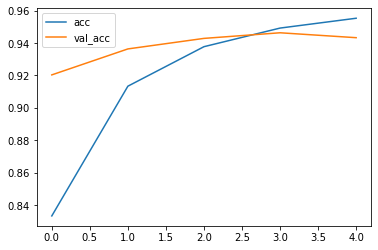

In [14]:
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

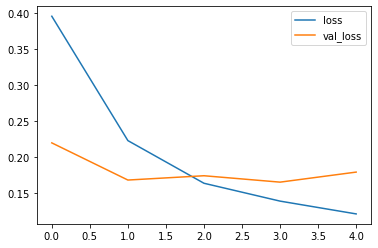

In [15]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [16]:
def predict_sentiment(text):
    tw = tokenzier.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("PredictedLabel = ",sentiment_label[1][prediction])

In [17]:
test_sentence = "This lecture was awful"
predict_sentiment(test_sentence)

1/1 [==============================] - 1s 1s/step
PredictedLabel =  negative


In [18]:
test_sentence2 = "This lecture was really good"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 74ms/step
PredictedLabel =  positive
